5000
torch.Size([1, 4, 192, 256])
Variable containing:
 0.4342
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]



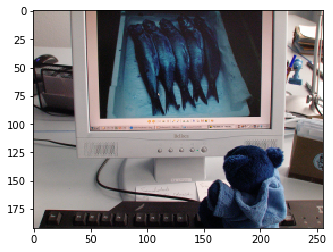

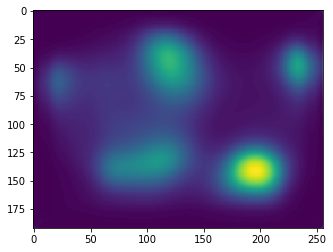

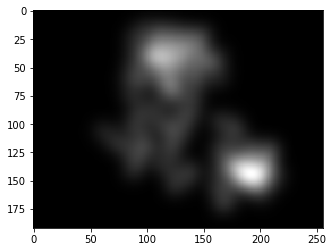

In [1]:
%matplotlib inline
import glob
import os
import cv2
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from generator import Generator
from discriminator import Discriminator
from PIL import Image

def to_variable(x,requires_grad=True):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x,requires_grad)

def show(img): # Display rgb tensor image
    pilTrans = transforms.ToPILImage()
    pilImg = pilTrans(img)
    s = np.array(pilImg)
    plt.figure()
    plt.imshow(s)
    
def show_gray(img): # Display grayscale tensor image
    pilTrans = transforms.ToPILImage()
    pilImg = pilTrans(img)
    s = np.array(pilImg)
    plt.figure()
    plt.imshow(s)
    
def show_img_from_path(imgPath):
    pilImg = Image.open(imgPath)
    s = np.array(pilImg)
    plt.figure()
    plt.imshow(s)
    
def predict(model, img):
    to_tensor = transforms.ToTensor() # Transforms 0-255 numbers to 0 - 1.0.
    im = to_tensor(img)
    inp = to_variable(im.unsqueeze(0), False)
    out = model(inp)
    map_out = out.cpu().data.squeeze(0)
    return map_out


pathToResizedImagesVal = '/home/bat/data/salicon/images256x192_val/'
pathToResizedMapsVal = '/home/bat/data/salicon/maps256x192_val/'

list_img = [k.split('/')[-1].split('.')[0] for k in glob.glob(os.path.join(pathToResizedImagesVal, '*val*'))]
print(len(list_img))

model = Generator()
pretrained_dict = torch.load('./../generator.pkl')
model.load_state_dict(pretrained_dict)
if torch.cuda.is_available():
    model.cuda()
#print(model)
imgName = list_img[400] + ".png"
img_path = pathToResizedImagesVal + imgName
map_ground_truth = pathToResizedMapsVal + imgName
img = cv2.imread(img_path)
sal_predicted = predict(model,img)
show(img)
show_gray(sal_predicted)
show_img_from_path(map_ground_truth)

to_tensor = transforms.ToTensor() # Transforms 0-255 numbers to 0 - 1.0.
im = to_tensor(img)
inp_d = torch.cat((im,sal_predicted),0)
inp_d.unsqueeze_(0)
print(inp_d.shape)
inp_d = to_variable(inp_d)

model = Discriminator()
pretrained_dict = torch.load('./../discriminator.pkl')
model.load_state_dict(pretrained_dict)
if torch.cuda.is_available():
    model.cuda()
output = model(inp_d)
print(output)

In [2]:
%matplotlib inline
import glob
import os
import cv2
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from discriminator import Discriminator
from PIL import Image

from data_loader import DataLoader

def to_variable(x,requires_grad=True):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x,requires_grad)

model = Discriminator()
pretrained_dict = torch.load('./../discriminator.pkl')
model.load_state_dict(pretrained_dict)
if torch.cuda.is_available():
    model.cuda()

dataloader = DataLoader(5)
(batch_img, batch_map) = dataloader.get_batch()
inp_d = torch.cat((batch_img,batch_map),1)
#print(inp_d[0,:,:,:].mean(), inp_d[0,:,:,:].std())
#print(inp_d[1,:,:,:].mean(), inp_d[1,:,:,:].std())

inp_d = to_variable(inp_d, False)
outputs = model(inp_d).squeeze()
print(outputs)
outputs = model(inp_d[2:4,:,:,:]).squeeze()
print(outputs)

Variable containing:
 0.4342
 0.4342
 0.4342
 0.4342
 0.4342
[torch.cuda.FloatTensor of size 5 (GPU 0)]

Variable containing:
 0.4342
 0.4342
[torch.cuda.FloatTensor of size 2 (GPU 0)]

